In [3]:
# Step 1: Install required libraries (Uncomment if necessary)
# !pip install tensorflow scikit-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.layers import Input, Dense
from keras.models import Sequential


In [4]:
# Step 2: Load the digits dataset (It's a small dataset for quick demonstration)
digits = load_digits()
X = digits.data
y = digits.target

In [6]:
# Step 3: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Step 4: Apply PCA
pca = PCA(n_components=30)  # Reducing to 30 principal components
X_pca = pca.fit_transform(X_scaled)

In [10]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [13]:
# # Step 6: Define the ANN model using Keras
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(30,)),  # Input layer with 30 features after PCA
#     Dense(32, activation='relu'),  # Hidden layer
#     Dense(10, activation='softmax')  # Output layer for 10 classes (digits 0-9)
# ])

# Define the input layer
input_layer = Input(shape=(30,))

# Create the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(30,)),  # Hidden layer 1
    Dense(32, activation='relu'),  # Hidden layer 2
    Dense(10, activation='softmax')  # Output layer
])

# Compile the model and do other cool stuff
# ...



In [16]:
# Step 7: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9750 - val_loss: 0.0885
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9750 - val_loss: 0.0895
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9750 - val_loss: 0.0892
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9750 - val_loss: 0.0895
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.7596e-04 - val_accuracy: 0.9750 - val_loss: 0.0891
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.7476e-04 - val_accuracy: 0.9750 - val_loss: 0.0896
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 9.3347e-04 - val_accuracy: 0.9750 - val_loss: 0.0898
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 7.7002e-04 - val_accuracy: 0.

In [21]:
# Step 9: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9833 - loss: 0.0723 
Test accuracy: 0.9778


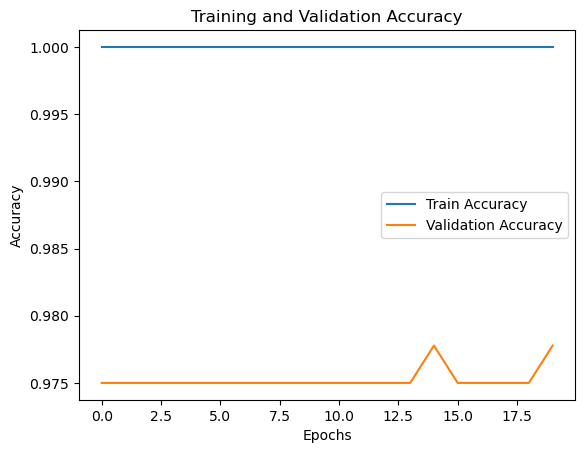

In [23]:
# Step 10: Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Step 11: Make predictions and evaluate
y_pred = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy after prediction: {accuracy:.4f}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy after prediction: 0.9778
